In [4]:
#MNIST DATASET

#import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split





In [5]:
#load the MNSIT DATASET
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [6]:
#normalize the dataset
x_train,x_test=x_train/255.0,x_test/255.0

In [7]:
#reshape the data for CNN
x_train_cnn=x_train.reshape(-1,28,28,1)
x_test_cnn=x_test.reshape(-1,28,28,1)

#one-hot encodiing for ann and cnn in data
y_train_oh=to_categorical(y_train,10)
y_test_oh=to_categorical(y_test,10)



In [8]:
#build an ANN model
#pass the images into 28*28 for 1D vectors
ann_model=Sequential([
    Flatten(input_shape=(28,28)),
    #first hidden layer
    Dense(128,activation='relu'),
    #second hidden layer
    Dense(64,activation='relu'),
    #output layer
    Dense(10,activation='softmax')
])

In [9]:
#Compile the model
ann_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
#train ANN model
ann_model.fit(x_train,y_train_oh,epochs=5,batch_size=32,validation_data=(x_test,y_test_oh))

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2429 - accuracy: 0.9286 - val_loss: 0.1335 - val_accuracy: 0.9607
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1044 - accuracy: 0.9684 - val_loss: 0.1012 - val_accuracy: 0.9687
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0721 - accuracy: 0.9772 - val_loss: 0.0816 - val_accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0560 - accuracy: 0.9822 - val_loss: 0.0732 - val_accuracy: 0.9778
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0426 - accuracy: 0.9862 - val_loss: 0.0743 - val_accuracy: 0.9777


In [11]:
#build the cnn model
#first convolutional layer
cnn_model=Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                     #pool layer
                     MaxPooling2D((2,2)),
                     #second CNN layer and pool layer
                     Conv2D(64,(3,3),activation='relu'),
                     MaxPooling2D((2,2)),
                     #flatten the feature to 1D vector
                     Flatten(),
                     #fully connected layer
                     Dense(64,activation='relu'),
                     #output layer
                     Dense(10,activation='softmax')
])

In [12]:
#Compile the model
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
#train CNN model
cnn_model.fit(x_train,y_train_oh,epochs=5,batch_size=32,validation_data=(x_test,y_test_oh))

Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 0.1421 - accuracy: 0.9572 - val_loss: 0.0520 - val_accuracy: 0.9841
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0478 - accuracy: 0.9855 - val_loss: 0.0356 - val_accuracy: 0.9876
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0329 - accuracy: 0.9895 - val_loss: 0.0311 - val_accuracy: 0.9902
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.0341 - val_accuracy: 0.9891
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0190 - accuracy: 0.9941 - val_loss: 0.0282 - val_accuracy: 0.9912


In [14]:
#build the knn model
x_train_knn=x_train.reshape(-1,28*28)
x_test_knn=x_test.reshape(-1,28*28)


In [15]:
#standardization of the data
scaler=StandardScaler()
x_train_knn=scaler.fit_transform(x_train_knn)
x_test_knn=scaler.transform(x_test_knn)

In [16]:
#create the model
knn_model=KNeighborsClassifier(n_neighbors=5)

In [17]:
#train the model
knn_model.fit(x_train_knn,y_train)

KNeighborsClassifier()

In [18]:
knn_accuracy=knn_model.score(x_test_knn,y_test)
print(f"KNN Accuracy: {knn_accuracy*100:.2f}%")

KNN Accuracy: 94.43%


313/313 [==============================] - 1s 2ms/step


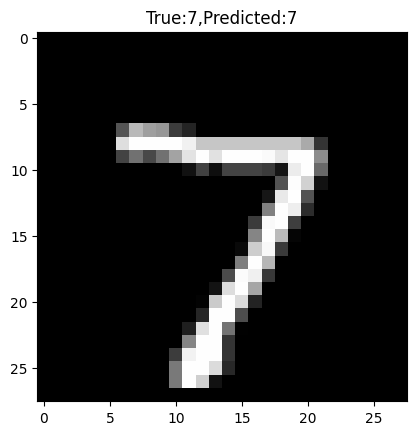

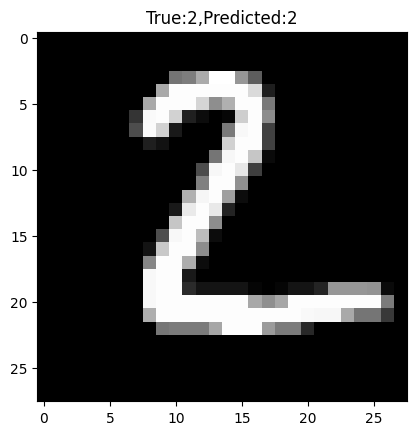

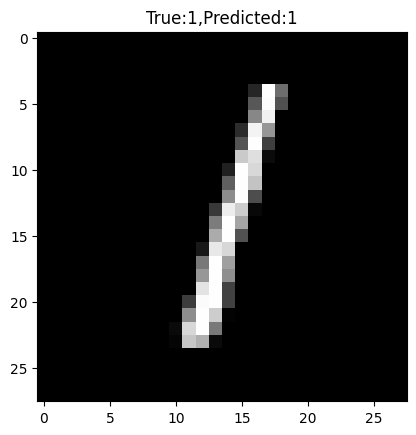

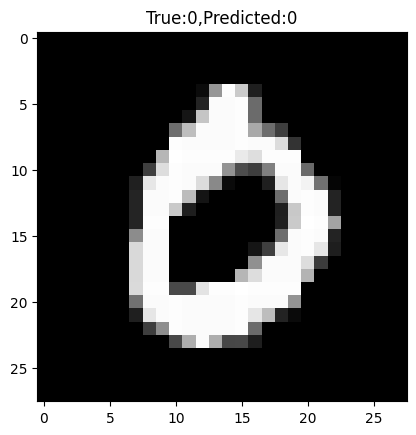

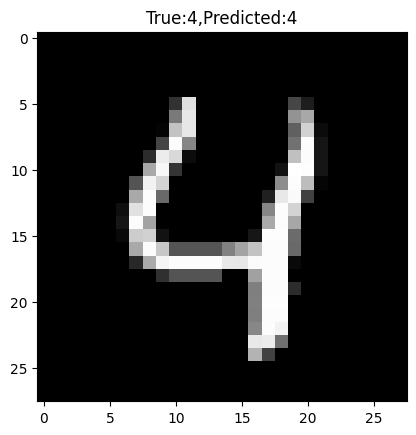

In [19]:
#the prediction with cnn
prediction=cnn_model.predict(x_test_cnn)

for i in range(5):
    plt.imshow(x_test[i],cmap='gray')
    plt.title(f"True:{y_test[i]},Predicted:{np.argmax(prediction[i])}")
    plt.show()
